In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(0)

In [3]:
M = 200  # Nombre de trajectoires
N = 1000 # Durée totale (en s)
T = np.arange(N)  # Indices des temps
c = 0.025  # Débit d'argent rentrant (en €/s)
lambda_T = 0.1  # Paramètre de la loi de Poisson pour les durées entre sinistres
lambda_X = 1  # Paramètre de la loi de Poisson pour le montant des sinistres
n_samples_per_time_unit = 1 + int(lambda_T + 5 * np.sqrt(lambda_T))  # Taille du tableau des sinistres
dN = np.hstack((np.zeros((M, 1)), np.random.poisson(lambda_T, (M, N - 1))))
X = np.random.exponential(1 / lambda_X, (M, N, n_samples_per_time_unit))
dS = np.sum((np.arange(n_samples_per_time_unit) < dN.reshape(M, N, 1)) * X, axis=2)
S = np.cumsum(dS, axis=1)

$u_{n} = 1 + c n - S_{n}$ où $S_{n} = \sum_{i = 0}^{N_{n}} X_i$.

In [4]:
u = 1 + c * T - S
u_alive = ~np.cumsum(u<0, axis=1).astype(bool)
u_cutted = u*(u_alive)

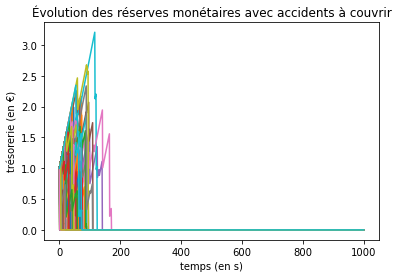

In [5]:
plt.title("Évolution des réserves monétaires avec accidents à couvrir")
plt.xlabel("temps (en s)")
plt.ylabel("trésorerie (en €)")
plt.plot(u_cutted.T)
plt.show()

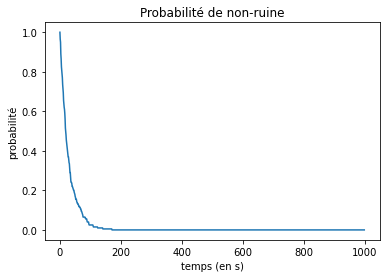

In [6]:
plt.title("Probabilité de non-ruine")
plt.xlabel("temps (en s)")
plt.ylabel("probabilité")
plt.plot(np.mean(u_alive, axis=0))
plt.show()

<ipython-input-7-2a18cc5a8dd6>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.mean(u_alive, axis=0)))


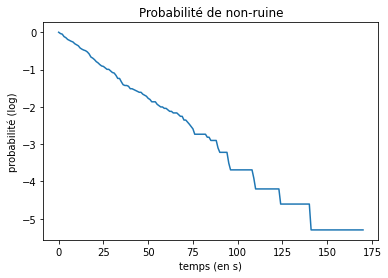

In [7]:
plt.title("Probabilité de non-ruine")
plt.xlabel("temps (en s)")
plt.ylabel("probabilité (log)")
plt.plot(np.log(np.mean(u_alive, axis=0)))
plt.show()